In [1]:
from pulp import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = pd.read_csv("Detection_Matrix.csv", header=None)
f.head()

,0,1,2,3,4,5,6,7,8,9,...,801,802,803,804,805,806,807,808,809,810
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,1,0,...,0,1,1,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,1,0,0,0,0,1,...,0,1,1,0,0,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
V = [i for i in range(811)]
E = 1123

In [4]:
prob = LpProblem("NetworkMonitor", LpMinimize)

In [5]:
# Decision Variable
sv = LpVariable.dicts("s", V, 0, cat='Binary')

In [6]:
# Objective Value
prob += lpSum([sv[v] for v in V])

In [7]:
# Constraints
for e in range(E):
    prob += lpSum([f.iloc[e,v]*sv[v] for v in V]) >= 1

In [8]:
path_to_Gurobi = '/Library/gurobi1003/macos_universal2/bin/gurobi_cl'
prob.solve(GUROBI_CMD(path=path_to_Gurobi,options=[("MIPGap", 0)]))

Set parameter Username
Set parameter MIPGapAbs to value 0
Set parameter LogFile to value "gurobi.log"
Academic license - for non-commercial use only - expires 2024-11-12
Using license file /Users/dipendra/gurobi.lic

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[rosetta2])
Copyright (c) 2023, Gurobi Optimization, LLC

Read LP format model from file /var/folders/nm/vy6jh_gd4fv2xcmvqc69gc_80000gn/T/50dccd31a0af42caa980705f08ca3222-pulp.lp
Reading time = 0.04 seconds
OBJ: 1123 rows, 811 columns, 132982 nonzeros

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1123 rows, 811 columns and 132982 nonzeros
Model fingerprint: 0xe7f09fba
Variable types: 0 continuous, 811 integer (811 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 28.0000000
Presolve removed 1052

1

In [9]:
# Check solution status
print('Solution status: {}'.format(LpStatus[prob.status]))

Solution status: Optimal


In [10]:
a_sensors = []
for v in V:
    if sv[v].varValue == 1:
        a_sensors.append(v)
        print(f'Node {v} has a sensor on it.')

Node 16 has a sensor on it.
Node 78 has a sensor on it.
Node 104 has a sensor on it.
Node 206 has a sensor on it.
Node 233 has a sensor on it.
Node 277 has a sensor on it.
Node 392 has a sensor on it.
Node 395 has a sensor on it.
Node 424 has a sensor on it.
Node 426 has a sensor on it.
Node 430 has a sensor on it.
Node 438 has a sensor on it.
Node 454 has a sensor on it.
Node 482 has a sensor on it.
Node 651 has a sensor on it.
Node 705 has a sensor on it.
Node 712 has a sensor on it.
Node 748 has a sensor on it.
Node 786 has a sensor on it.


In [11]:
print(f'Total number of sensors: {prob.objective.value()}')

Total number of sensors: 19.0


In [14]:
obj_vals = []
nodes = {}
for b in range(21):
    prob = LpProblem("NetworkMonitor", LpMaximize)
    p=0.1
    
    # Decision Variable
    sv = LpVariable.dicts("s", V, 0, cat='Binary')

    # Objective Value
    prob += lpSum([f.iloc[e,v]*sv[v]*p for v in V for e in range(E)])
    
    # Constraints
    prob += lpSum([sv[v] for v in V]) <= b
    
    prob.solve(GUROBI_CMD(path=path_to_Gurobi,options=[("MIPGap", 0)]))
    
    sensors = []
    for v in V:
        if sv[v].varValue == 1:
            sensors.append(v)
    nodes[b] = sensors
    obj_vals.append(prob.objective.value()) 

Set parameter Username
Set parameter MIPGap to value 0
Set parameter LogFile to value "gurobi.log"
Academic license - for non-commercial use only - expires 2024-11-12
Using license file /Users/dipendra/gurobi.lic

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[rosetta2])
Copyright (c) 2023, Gurobi Optimization, LLC

Read LP format model from file /var/folders/nm/vy6jh_gd4fv2xcmvqc69gc_80000gn/T/c34d5a72759046a3b101a714d57a88e2-pulp.lp
Reading time = 0.00 seconds
OBJ: 1 rows, 811 columns, 811 nonzeros

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 811 columns and 811 nonzeros
Model fingerprint: 0x0832e0b4
Variable types: 0 continuous, 811 integer (811 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 1 rows and 811 colu

Set parameter Username
Set parameter MIPGap to value 0
Set parameter LogFile to value "gurobi.log"
Academic license - for non-commercial use only - expires 2024-11-12
Using license file /Users/dipendra/gurobi.lic

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[rosetta2])
Copyright (c) 2023, Gurobi Optimization, LLC

Read LP format model from file /var/folders/nm/vy6jh_gd4fv2xcmvqc69gc_80000gn/T/cc0bd85fb89345e2b88b5c6424b841a8-pulp.lp
Reading time = 0.00 seconds
OBJ: 1 rows, 811 columns, 811 nonzeros

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 811 columns and 811 nonzeros
Model fingerprint: 0xb3592ea6
Variable types: 0 continuous, 811 integer (811 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [6e+00, 6e+00]
Found heuristic solution: objective 128.5000000
Presolve removed 1 rows and 811 col

Set parameter Username
Set parameter MIPGap to value 0
Set parameter LogFile to value "gurobi.log"
Academic license - for non-commercial use only - expires 2024-11-12
Using license file /Users/dipendra/gurobi.lic

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[rosetta2])
Copyright (c) 2023, Gurobi Optimization, LLC

Read LP format model from file /var/folders/nm/vy6jh_gd4fv2xcmvqc69gc_80000gn/T/eb4471781a4f472cacb19cfc4f716c18-pulp.lp
Reading time = 0.00 seconds
OBJ: 1 rows, 811 columns, 811 nonzeros

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 811 columns and 811 nonzeros
Model fingerprint: 0x580d3cae
Variable types: 0 continuous, 811 integer (811 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 1e+01]
Found heuristic solution: objective 237.1000000
Presolve removed 1 rows and 811 col

Set parameter Username
Set parameter MIPGap to value 0
Set parameter LogFile to value "gurobi.log"
Academic license - for non-commercial use only - expires 2024-11-12
Using license file /Users/dipendra/gurobi.lic

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[rosetta2])
Copyright (c) 2023, Gurobi Optimization, LLC

Read LP format model from file /var/folders/nm/vy6jh_gd4fv2xcmvqc69gc_80000gn/T/bea12ea6ea814e3784e99081cb43b0f2-pulp.lp
Reading time = 0.00 seconds
OBJ: 1 rows, 811 columns, 811 nonzeros

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 811 columns and 811 nonzeros
Model fingerprint: 0x3b29bf34
Variable types: 0 continuous, 811 integer (811 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+01, 2e+01]
Found heuristic solution: objective 339.7000000
Presolve removed 1 rows and 811 col

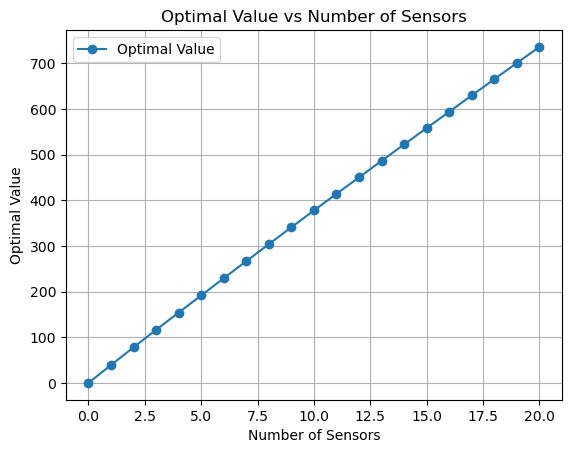

In [17]:
# Plotting
plt.plot([len(nodes[k]) for k in nodes.keys()], obj_vals, label='Optimal Value', marker='o', linestyle='-')
plt.title('Optimal Value vs Number of Sensors')
plt.xlabel('Number of Sensors')
plt.ylabel('Optimal Value')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
w = pd.read_csv("Criticality.csv", header=None)
w = w[0].values
w

array([0.12, 0.41, 0.02, ..., 0.74, 0.94, 0.97])

In [31]:
obj_vals = []
nodes = {}
path_to_Gurobi = '/Library/gurobi1003/macos_universal2/bin/gurobi_cl'
for b in range(21):
    prob = LpProblem("NetworkMonitor", LpMinimize)
    
    # Decision Variable
    sv = LpVariable.dicts("s", V, 0, cat='Binary')
    y = LpVariable.dicts("y", [e for e in range(E)], 0, cat='Binary')
    z = LpVariable("z", lowBound = 0, cat='Continuous')

    # Objective Value
    prob += z
    
    # Constraints
    prob += lpSum([sv[v] for v in V]) <= b
    for e in range(E):
        prob += z >= y[e]*w[e]
        prob +=  lpSum([f.iloc[e,v]*sv[v] for v in V]) >= (1-y[e])
    
    prob.solve(GUROBI_CMD(path=path_to_Gurobi,options=[("MIPGap", 0)]))
    
    sensors = []
    for v in V:
        if sv[v].varValue == 1:
            sensors.append(v)
    nodes[b] = sensors
    obj_vals.append(prob.objective.value())
    print(prob.objective.value())

Set parameter Username
Set parameter MIPGap to value 0
Set parameter LogFile to value "gurobi.log"
Academic license - for non-commercial use only - expires 2024-11-12
Using license file /Users/dipendra/gurobi.lic

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[rosetta2])
Copyright (c) 2023, Gurobi Optimization, LLC

Read LP format model from file /var/folders/nm/vy6jh_gd4fv2xcmvqc69gc_80000gn/T/3c05edf568554c418dc0b6c7ce8d20d7-pulp.lp
Reading time = 0.04 seconds
OBJ: 2247 rows, 1935 columns, 137162 nonzeros

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2247 rows, 1935 columns and 137162 nonzeros
Model fingerprint: 0x40d49ec5
Variable types: 1 continuous, 1934 integer (1934 binary)
Coefficient statistics:
  Matrix range     [1e-02, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 2247 rows and 1935 columns
Presolve time: 0.01s
Pr

Set parameter Username
Set parameter MIPGap to value 0
Set parameter LogFile to value "gurobi.log"
Academic license - for non-commercial use only - expires 2024-11-12
Using license file /Users/dipendra/gurobi.lic

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[rosetta2])
Copyright (c) 2023, Gurobi Optimization, LLC

Read LP format model from file /var/folders/nm/vy6jh_gd4fv2xcmvqc69gc_80000gn/T/1cc4b4cfd77742dd999d57b4a04bb540-pulp.lp
Reading time = 0.04 seconds
OBJ: 2247 rows, 1935 columns, 137162 nonzeros

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2247 rows, 1935 columns and 137162 nonzeros
Model fingerprint: 0xbbf83047
Variable types: 1 continuous, 1934 integer (1934 binary)
Coefficient statistics:
  Matrix range     [1e-02, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Presolve removed 16 rows and 413 columns
Presolve time: 0.11s
Preso

     0     0    0.73114    0  142    0.98000    0.73114  25.4%     -    0s
     0     0    0.73806    0  151    0.98000    0.73806  24.7%     -    0s
H    0     0                       0.9700000    0.73806  23.9%     -    0s
H    0     0                       0.9600000    0.73806  23.1%     -    0s
     0     0    0.95000    0    7    0.96000    0.95000  1.04%     -    0s
*    0     0               0       0.9500000    0.95000  0.00%     -    0s

Explored 1 nodes (5040 simplex iterations) in 0.71 seconds (1.13 work units)
Thread count was 8 (of 8 available processors)

Solution count 5: 0.95 0.96 0.97 ... 1

Optimal solution found (tolerance 0.00e+00)
Best objective 9.500000000000e-01, best bound 9.500000000000e-01, gap 0.0000%

Wrote result file '/var/folders/nm/vy6jh_gd4fv2xcmvqc69gc_80000gn/T/e707c9ab474e425587d61e5fc950bca0-pulp.sol'

0.95
Set parameter Username
Set parameter MIPGap to value 0
Set parameter LogFile to value "gurobi.log"
Academic license - for non-commercial use onl

0.82
Set parameter Username
Set parameter MIPGap to value 0
Set parameter LogFile to value "gurobi.log"
Academic license - for non-commercial use only - expires 2024-11-12
Using license file /Users/dipendra/gurobi.lic

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[rosetta2])
Copyright (c) 2023, Gurobi Optimization, LLC

Read LP format model from file /var/folders/nm/vy6jh_gd4fv2xcmvqc69gc_80000gn/T/bd68d217fb7542c693be33a57cf5c5c9-pulp.lp
Reading time = 0.04 seconds
OBJ: 2247 rows, 1935 columns, 137162 nonzeros

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2247 rows, 1935 columns and 137162 nonzeros
Model fingerprint: 0x7d4418a7
Variable types: 1 continuous, 1934 integer (1934 binary)
Coefficient statistics:
  Matrix range     [1e-02, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Presolve removed 25 rows and 418 columns
Presolve time: 0.14s



Root relaxation: objective 1.284026e-01, 1480 iterations, 0.05 seconds (0.11 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.12840    0  424    1.00000    0.12840  87.2%     -    0s
H    0     0                       0.9500000    0.12840  86.5%     -    0s
H    0     0                       0.9400000    0.12840  86.3%     -    0s
     0     0    0.26734    0  159    0.94000    0.26734  71.6%     -    0s
H    0     0                       0.6400000    0.26734  58.2%     -    0s
     0     0     cutoff    0         0.64000    0.64000  0.00%     -    0s

Cutting planes:
  Gomory: 33
  MIR: 1
  RLT: 12
  Relax-and-lift: 4

Explored 1 nodes (2415 simplex iterations) in 0.59 seconds (0.91 work units)
Thread count was 8 (of 8 available processors)

Solution count 4: 0.64 0.94 0.95 1 

Optimal solution found (tolerance 0.00e+00)
Best objective 6.400000000000e-0

Found heuristic solution: objective 1.0000000

Root relaxation: objective 0.000000e+00, 686 iterations, 0.03 seconds (0.04 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0       0.0000000    0.00000  0.00%     -    0s

Explored 1 nodes (1163 simplex iterations) in 0.23 seconds (0.49 work units)
Thread count was 8 (of 8 available processors)

Solution count 2: 0 1 

Optimal solution found (tolerance 0.00e+00)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%

Wrote result file '/var/folders/nm/vy6jh_gd4fv2xcmvqc69gc_80000gn/T/34ab74039a1c4dd5923e96d2c979b6e7-pulp.sol'

0.0
Set parameter Username
Set parameter MIPGap to value 0
Set parameter LogFile to value "gurobi.log"
Academic license - for non-commercial use only - expires 2024-11-12
Using license file /Users/dipendra/gurobi.lic

Gurobi Optimizer version 10.0.3 bui

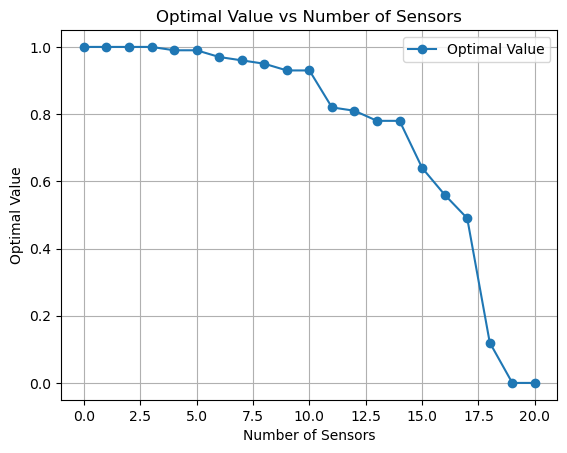

In [32]:
# Plotting
plt.plot([len(nodes[k]) for k in nodes.keys()], obj_vals, label='Optimal Value', marker='o', linestyle='-')
plt.title('Optimal Value vs Number of Sensors')
plt.xlabel('Number of Sensors')
plt.ylabel('Optimal Value')
plt.legend()
plt.grid(True)
plt.show()